## Springboard Data Science Capstone Two

### 3. Exploratory Data Analysis
In this part of the project, we'll focus on gaining insights and understanding about the data.  Features will be investigated using either visualization tools or statistics models.  The goal is to have a better understanding of the core characteristics of the data and identify statistical relationship strengths that could be used to develope hypotheses for further analysis.


### 3.1 Sourcing & Loading

#### 3.1.1 Import relevant libraries and packages


In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
import statsmodels.api as sm
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

#### 3.1.2 Import & review data

In [268]:
df = pd.read_csv("flight_lax.csv")

In [269]:
df.head(3)

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,CANCELLATION_REASON,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
0,0,1,1,4,2336,LAX,PBI,10,280.0,2330,750,0,0,Unknown,Los Angeles,CA,West Palm Beach,FL,American Airlines Inc.
1,1,1,1,4,258,LAX,MIA,20,285.0,2342,805,0,0,Unknown,Los Angeles,CA,Miami,FL,American Airlines Inc.
2,2,1,1,4,2013,LAX,CLT,30,273.0,2125,803,0,0,Unknown,Los Angeles,CA,Charlotte,NC,US Airways Inc.


In [270]:
# Let's get rid of the first column "Unnamed:0" and then check the size of the data.
df.drop(['Unnamed: 0', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE'], axis=1, inplace=True)

# Flight numbers don't seem to be contributing much in flight delays. Therefore, we'll delete the 
# 'FLIGHT_NUMBER' column.
df.drop('FLIGHT_NUMBER', axis=1, inplace=True)

In [271]:
df.shape
df.head(5)

,MONTH,DAY,DAY_OF_WEEK,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,CANCELLATION_REASON,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
0,1,1,4,PBI,10,280.0,2330,750,0,0,Unknown,West Palm Beach,FL,American Airlines Inc.
1,1,1,4,MIA,20,285.0,2342,805,0,0,Unknown,Miami,FL,American Airlines Inc.
2,1,1,4,CLT,30,273.0,2125,803,0,0,Unknown,Charlotte,NC,US Airways Inc.
3,1,1,4,MSP,35,214.0,1535,609,0,0,Unknown,Minneapolis,MN,Delta Air Lines Inc.
4,1,1,4,MIA,105,286.0,2342,851,0,0,Unknown,Miami,FL,American Airlines Inc.


In [272]:
airline = pd.DataFrame()
airline['TOTAL_FLIGHTS'] = df[['AIRLINE', 'CANCELLED']].groupby('AIRLINE').count()

In [273]:
airline['CANCELLED'] = df[['AIRLINE', 'CANCELLED']].groupby('AIRLINE').sum()
airline['%_CANCELLED'] = airline['CANCELLED']/airline['TOTAL_FLIGHTS']
airline.sort_values(by = '%_CANCELLED', ascending=[False])

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
AIRLINE,,,
American Eagle Airlines Inc.,184,13,0.070652
Southwest Airlines Co.,37511,796,0.021220
Spirit Air Lines,4344,55,0.012661
Skywest Airlines Inc.,36691,455,0.012401
United Air Lines Inc.,27429,298,0.010864
American Airlines Inc.,32738,323,0.009866
JetBlue Airways,4108,33,0.008033
US Airways Inc.,3688,27,0.007321
Virgin America,11801,76,0.006440


In [274]:
airline = airline.sort_values(by = 'CANCELLED', ascending=[False])

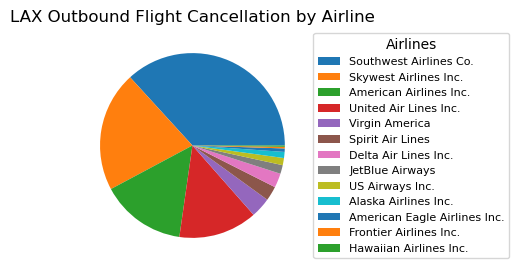

In [279]:
airline = airline.reset_index()
airline_name = airline['AIRLINE']
airline_cancel = airline['CANCELLED']

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, autotexts = ax.pie(airline_cancel, textprops=dict(color="w"))

ax.legend(wedges, airline_name,
          title="Airlines", 
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("LAX Outbound Flight Cancellation by Airline")
plt.show()

In [277]:
destination_state = pd.DataFrame()
destination_state['TOTAL_FLIGHTS'] = df[['DESTINATION_STATE', 'CANCELLED']].groupby('DESTINATION_STATE').count()
destination_state['CANCELLED'] = df[['DESTINATION_STATE', 'CANCELLED']].groupby('DESTINATION_STATE').sum()
destination_state['%_CANCELLED'] = destination_state['CANCELLED']/destination_state['TOTAL_FLIGHTS']
destination_state = destination_state.sort_values(by = '%_CANCELLED', ascending=[False])
destination_state.head(5)

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DESTINATION_STATE,,,
CA,44236,990,0.022380
WY,255,5,0.019608
KS,58,1,0.017241
NM,2067,32,0.015481
NJ,4618,71,0.015375


In [157]:
destination_state = destination_state.sort_values(by = 'CANCELLED', ascending=[False])
destination_state.head(5)

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DESTINATION_STATE,,,
CA,44236,990,0.022380
TX,19970,185,0.009264
NY,12015,143,0.011902
IL,10120,126,0.012451
AZ,9965,94,0.009433


In [118]:
month = pd.DataFrame()
month['TOTAL_FLIGHTS'] = df[['MONTH', 'CANCELLED']].groupby('MONTH').count()
month['CANCELLED'] = df[['MONTH', 'CANCELLED']].groupby('MONTH').sum()
month['%_CANCELLED'] = month['CANCELLED']/month['TOTAL_FLIGHTS']
month

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
MONTH,,,
1,17340,251,0.014475
2,15762,327,0.020746
3,18014,183,0.010159
4,17408,103,0.005917
5,17977,97,0.005396
6,18533,280,0.015108
7,19371,283,0.014609
8,19265,244,0.012665
9,17499,104,0.005943


Text(0.5, 1.0, 'FLIGHTS CANCELLED BY MONTH')

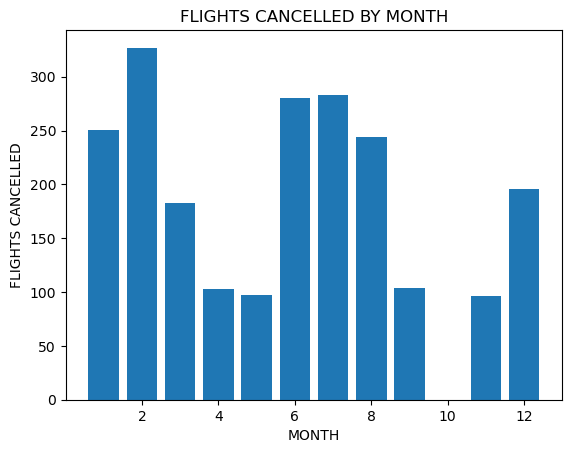

In [119]:
month = month.reset_index()
plt.bar(month['MONTH'], month['CANCELLED'])
plt.xlabel('MONTH')
plt.ylabel('FLIGHTS CANCELLED')
plt.title('FLIGHTS CANCELLED BY MONTH')

In [120]:
day_of_week = pd.DataFrame()
day_of_week['TOTAL_FLIGHTS'] = df[['DAY_OF_WEEK', 'CANCELLED']].groupby('DAY_OF_WEEK').count()
day_of_week['CANCELLED'] = df[['DAY_OF_WEEK', 'CANCELLED']].groupby('DAY_OF_WEEK').sum()
day_of_week['%_CANCELLED'] = day_of_week['CANCELLED']/day_of_week['TOTAL_FLIGHTS']
day_of_week.sort_values(by = '%_CANCELLED', ascending=[False])

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DAY_OF_WEEK,,,
1,29027,427,0.014710
2,28276,414,0.014641
3,28523,313,0.010974
4,28785,295,0.010248
7,27684,280,0.010114
5,28317,239,0.008440
6,24061,196,0.008146


Text(0.5, 1.0, 'FLIGHTS CANCELLED BY DAY OF WEEK')

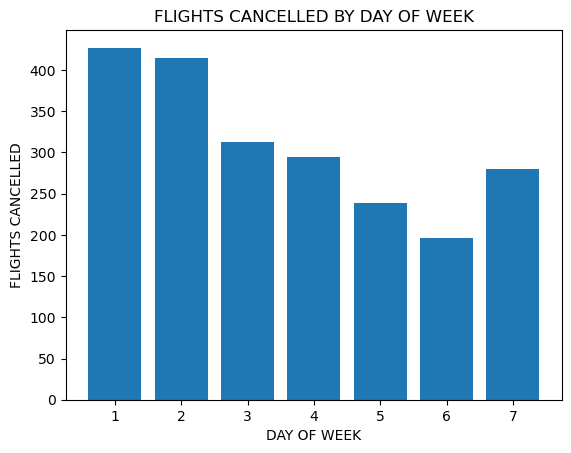

In [121]:
day_of_week = day_of_week.reset_index()
plt.bar(day_of_week['DAY_OF_WEEK'], day_of_week['CANCELLED'])
plt.xlabel('DAY OF WEEK')
plt.ylabel('FLIGHTS CANCELLED')
plt.title('FLIGHTS CANCELLED BY DAY OF WEEK')

In [164]:
ca_cancel = df[(df['DESTINATION_STATE']=='CA') & (df['CANCELLED']==1)]

<AxesSubplot:xlabel='DESTINATION_AIRPORT', ylabel='count'>

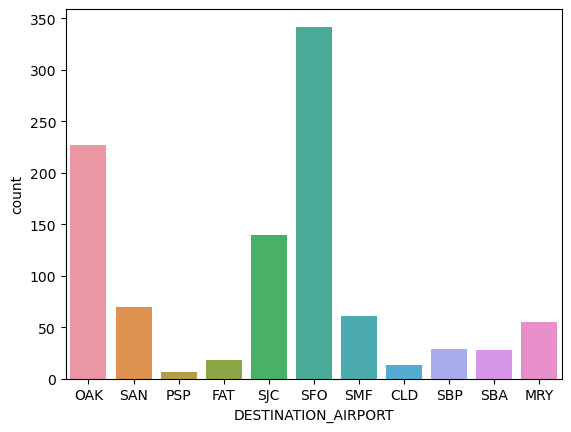

In [165]:
sns.countplot(x='DESTINATION_AIRPORT', data=ca_cancel)

In [166]:
cancel = df[df['CANCELLED']==1]

<AxesSubplot:xlabel='DESTINATION_AIRPORT', ylabel='count'>

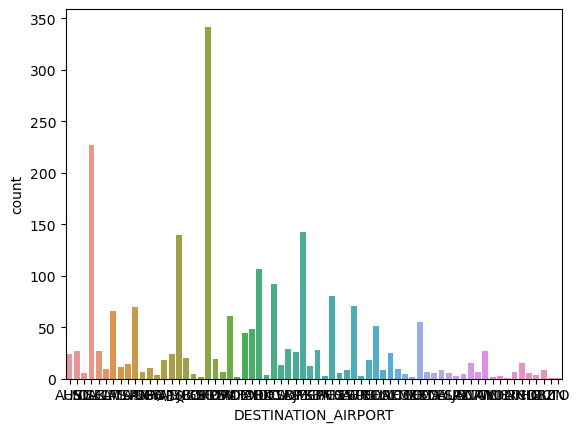

In [168]:
sns.countplot(x='DESTINATION_AIRPORT', data=cancel)

<AxesSubplot:>

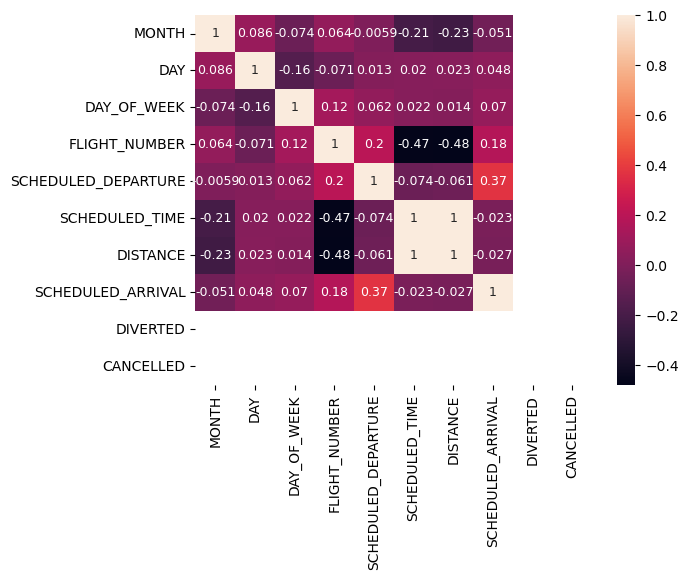

In [172]:
sns.heatmap(cancel.corr(), annot=True, annot_kws={'size': 9})

In [122]:
# delay = df[(df['ARRIVAL_DELAY']>0) & (df['ARRIVAL_DELAY']!=9998) & (df['ARRIVAL_DELAY']!=9999)]

# delay['ARRIVAL_DELAY'].describe()

In [123]:
# plt.hist(delay["ARRIVAL_DELAY"], bins=(0, 15, 30, 60, 120, 240, 480, 960))
# plt.show()

Based upon the above analysis, we can see that the average flight delay is 15 minutes, which is considered "very short" or "minor delay", and typically wouldn't cause any delivery claims. Since the purpose of this investigation is to reduce late delivery claims, and a flight arrival window of +/- 15 minutes is typically considered "normal" and won't have much negative impact on the final delivery time, we shall focus on the the flight delays of more than 15 minutes.

In [124]:
# delay_15 = delay[delay['ARRIVAL_DELAY']>15]
# delay_15['ARRIVAL_DELAY'].describe()

In [125]:
# plt.hist(delay_15["ARRIVAL_DELAY"], bins=(15, 30, 60, 120, 240, 480, 960))
# plt.show()

In [126]:
#plt.boxplot(delay_15['ARRIVAL_DELAY'])

In [127]:
#df[df['MONTH']==10]

As we can see from the above histogram, most of the flight delays are within 1-2 hours. To facilitate further analysis, we are going to add a column "DELAY_CATEGORY" to categorize the
delay times based on the following intervals:

* 0-30 minutes: Very short delay
* 31-60 minutes: Short delay
* 61-120 minutes: Moderate delay
* 121-240 minutes: Long delay
* Over 240 minutes: Very long delay

### 3.2 Data Exploration

#### 3.2.1 Airline Overview

We want to study the relationship between total number of flights and the number of flight delays grouped by airlines, months, days, days of the week, and destination airports.  We'll make our own functions to do that.  


In [128]:
'''
def create_df(name, group):
    name['TOTAL_FLIGHT'] = df[['ARRIVAL_DELAY', group]].groupby([group]).count()   
    name['ON_TIME'] = df[['ARRIVAL_DELAY', group]][df['ARRIVAL_DELAY']<=0].groupby([group]).count()
    name['DIVERT'] = df[['ARRIVAL_DELAY', group]][df['ARRIVAL_DELAY']==9998].groupby([group]).count() 
    name['CANCEL'] = df[['ARRIVAL_DELAY', group]][df['ARRIVAL_DELAY']==9999].groupby([group]).count()  
    name['DELAY'] = df[['ARRIVAL_DELAY', group]][(df['ARRIVAL_DELAY']>0) & (df['ARRIVAL_DELAY']<9998)].groupby([group]).count()
    name = name.reset_index()
    return name
'''

"\ndef create_df(name, group):\n    name['TOTAL_FLIGHT'] = df[['ARRIVAL_DELAY', group]].groupby([group]).count()   \n    name['ON_TIME'] = df[['ARRIVAL_DELAY', group]][df['ARRIVAL_DELAY']<=0].groupby([group]).count()\n    name['DIVERT'] = df[['ARRIVAL_DELAY', group]][df['ARRIVAL_DELAY']==9998].groupby([group]).count() \n    name['CANCEL'] = df[['ARRIVAL_DELAY', group]][df['ARRIVAL_DELAY']==9999].groupby([group]).count()  \n    name['DELAY'] = df[['ARRIVAL_DELAY', group]][(df['ARRIVAL_DELAY']>0) & (df['ARRIVAL_DELAY']<9998)].groupby([group]).count()\n    name = name.reset_index()\n    return name\n"

In [129]:
'''
airline = pd.DataFrame()
airline = create_df(airline, 'AIRLINE')
airline = airline.sort_values(by = 'DELAY', ascending=[False])
airline
'''

"\nairline = pd.DataFrame()\nairline = create_df(airline, 'AIRLINE')\nairline = airline.sort_values(by = 'DELAY', ascending=[False])\nairline\n"

In [130]:
def draw_plot(df, g):
    plt.bar(df[g], df['ON_TIME'], color='yellowgreen')
    plt.bar(df[g], df['DELAY'], bottom=df['ON_TIME'], color='seagreen')
    plt.bar(df[g], df['DIVERT'], bottom=df['ON_TIME']+df['DELAY'], color='lightgreen')
    plt.bar(df[g], df['CANCEL'], bottom=df['ON_TIME']+df['DELAY']+df['DIVERT'], color='darkolivegreen')
    plt.ylabel("Number of Flights")
    plt.legend(["On Time", "Delay", "Divert", "Cancel"])
    plt.xticks(rotation=90)
    plt.title("LAX OUTBOUND FLIGHTS BY " + g)
    plt.show()

In [131]:
# _ = draw_plot(airline, 'AIRLINE')

From the above chart, we can see that Southwest Airlines has the most outbound flights from LAX as well as the most flight delays and cancellations.  Skywest ranks the second, followed by American Airlines, United and Delta.  Next, we'll take a look at the destinaton airports and check to see if there's any relationship between the destination & the flight delay.

#### 3.2.2 XXX Overview


In [132]:
'''
month = pd.DataFrame()
month = create_df(month, 'MONTH')
month
'''

"\nmonth = pd.DataFrame()\nmonth = create_df(month, 'MONTH')\nmonth\n"

In [133]:
# _ = draw_plot(month, 'MONTH')

In [134]:
'''
day_of_week = pd.DataFrame()
day_of_week = create_df(day_of_week, 'DAY_OF_WEEK')
day_of_week
'''

"\nday_of_week = pd.DataFrame()\nday_of_week = create_df(day_of_week, 'DAY_OF_WEEK')\nday_of_week\n"

In [135]:
# _ = draw_plot(day_of_week, 'DAY_OF_WEEK')

In [136]:
'''
destination_airport = pd.DataFrame()
destination_airport = create_df(destination_airport, 'DESTINATION_AIRPORT')
destination_airport = destination_airport.sort_values(by = 'DELAY', ascending=[False])
destination_airport
'''

"\ndestination_airport = pd.DataFrame()\ndestination_airport = create_df(destination_airport, 'DESTINATION_AIRPORT')\ndestination_airport = destination_airport.sort_values(by = 'DELAY', ascending=[False])\ndestination_airport\n"

In [137]:
# destination_airport.fillna(0)

In [138]:
# _ = draw_plot(destination_airport, 'DESTINATION_AIRPORT')

In [139]:
'''
destination_state = pd.DataFrame()
destination_state = create_df(destination_state, 'DESTINATION_STATE')
destination_state = destination_state.sort_values(by = 'DELAY', ascending=[False])
destination_state
'''

"\ndestination_state = pd.DataFrame()\ndestination_state = create_df(destination_state, 'DESTINATION_STATE')\ndestination_state = destination_state.sort_values(by = 'DELAY', ascending=[False])\ndestination_state\n"

In [140]:
# destination_state.fillna(0)
# _ = draw_plot(destination_state, 'DESTINATION_STATE')

In [141]:
# delay_ca = delay[delay['DESTINATION_STATE']=='CA']
# delay_ca['ARRIVAL_DELAY'].describe()

In [142]:
# df_ca = df[df['DESTINATION_STATE']=='CA']
# df_ca['TOTAL_FLIGHTS'] = df['']

In [143]:
# cancel_ca = df[(df['DESTINATION_STATE']=='CA') & (df['ARRIVAL_DELAY']==9999)]
# cancel_ca_airport = cancel_ca[['DESTINATION_AIRPORT', 'ARRIVAL_DELAY']].groupby(['DESTINATION_AIRPORT']).count()
# cancel_ca_airport

In [144]:
'''
sns.catplot(x='AIRLINE', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])
plt.xticks(rotation=90)
plt.show()
'''

"\nsns.catplot(x='AIRLINE', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])\nplt.xticks(rotation=90)\nplt.show()\n"

In [145]:
'''
sns.catplot(x='MONTH', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])
plt.xticks(rotation=90)
plt.show()
'''

"\nsns.catplot(x='MONTH', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])\nplt.xticks(rotation=90)\nplt.show()\n"

In [146]:
'''
sns.catplot(x='DAY', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])
plt.xticks(rotation=90)
plt.show()
'''

"\nsns.catplot(x='DAY', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])\nplt.xticks(rotation=90)\nplt.show()\n"

In [147]:
'''
sns.catplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])
plt.xticks(rotation=90)
plt.show()
'''

"\nsns.catplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', data=delay_15, kind='box', whis=[5,95])\nplt.xticks(rotation=90)\nplt.show()\n"

In [ ]:
# Make a pairplot of the flight data
# sns.pairplot(delay)

As we can see from the above pairplot, there is no existing correlation between any two variables.  To verify this, we'll do a heatmap.  

In [149]:
# sns.heatmap(df.corr(), annot=True, annot_kws={'size': 9})

#### 3.2.2 Flight cancellation

Compared to flight delays, flight cancellation and diversion are much worse.  Therefore, cancellation and diversion needs more
scrutiny. Let's look at flight cancellation first.

In [150]:
# cancelled = df[df["ARRIVAL_DELAY"]==9999]
# cancelled.shape

In [151]:
'''
sns.countplot(x="AIRLINE", data=cancelled)
plt.xticks(rotation=90)
plt.title("LAX Outbound Flight Cancellation by Airline")
plt.show()
'''

'\nsns.countplot(x="AIRLINE", data=cancelled)\nplt.xticks(rotation=90)\nplt.title("LAX Outbound Flight Cancellation by Airline")\nplt.show()\n'

In [152]:
'''
diverted = df[df["ARRIVAL_DELAY"]==9998]
diverted.shape
'''

'\ndiverted = df[df["ARRIVAL_DELAY"]==9998]\ndiverted.shape\n'

In [153]:
'''
sns.countplot(x="AIRLINE", data=diverted)
plt.xticks(rotation=90)
plt.title("LAX Outbound Flight Diversion by Airline")
plt.show()
'''

'\nsns.countplot(x="AIRLINE", data=diverted)\nplt.xticks(rotation=90)\nplt.title("LAX Outbound Flight Diversion by Airline")\nplt.show()\n'